<a href="https://colab.research.google.com/github/karthikgurunath/PCAIML_practical_App1/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [272]:
data = pd.read_csv('coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [273]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


Most of the values for car column is missing. We can drop car column as it has no significance/importance in the dataset. Other missing columns such as coffeeHouse, CarryAway have few missing field that is negligible and would not affect the overall data.

3. Decide what to do about your missing data -- drop, replace, other...

In [274]:
data.drop('car',axis= 1, inplace= True)
data[['Bar']].dropna()


,Bar
0,never
1,never
2,never
3,never
4,never
...,...
12679,never
12680,never
12681,never
12682,never


Most of the values for car column is missing. We can drop car column as it has no significance/importance in the dataset. Other missing columns such as coffeeHouse, CarryAway have few missing field that is negligible and would not affect the overall data analysis.



4. What proportion of the total observations chose to accept the coupon?



In [290]:
# mean of the column Y should give us the proportion of observation to accept the coupon
print("Coupon accepted by the observed:", data['Y'].mean() * 100, "%")


Coupon accepted by the observed: 56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

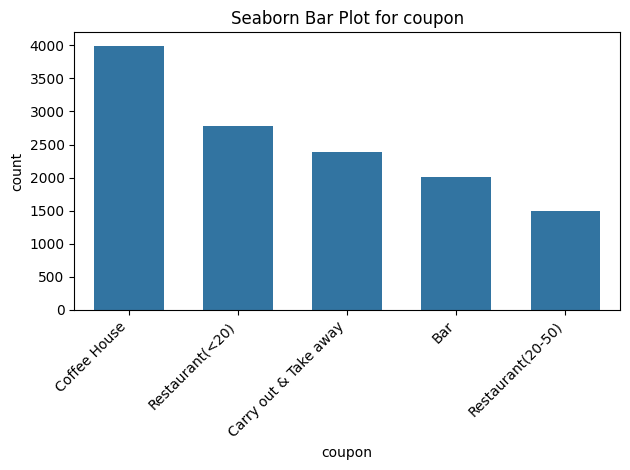

In [291]:
sns.barplot(data['coupon'].value_counts(), gap = 0.2)
plt.xticks(rotation=45, ha='right')
plt.title('Seaborn Bar Plot for coupon')
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

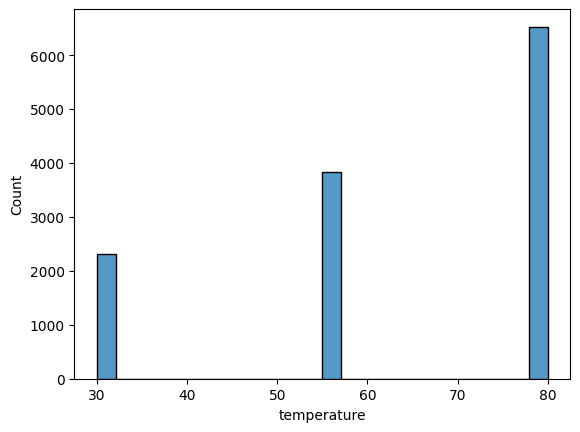

In [277]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [278]:
databar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [279]:
print("proportion of bar coupons accepted: ", databar['Y'].mean())


proportion of bar coupons accepted:  0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [280]:

threeAndbelow = ['never', 'less1', '1~3']
more_than_3 = ['4~8', 'gt8']
df_hreeAndbelow = databar[databar['Bar'].isin(threeAndbelow)]
df_more_than_3 = databar[databar['Bar'].isin(more_than_3)]
print("acceptance rate for those who went to 3 or less times is :", df_hreeAndbelow['Y'].mean())
print("acceptance rate for those who went more than 3 times is  :", df_more_than_3['Y'].mean())



acceptance rate for those who went to 3 or less times is : 0.37061769616026713
acceptance rate for those who went more than 3 times is  : 0.7688442211055276


Drivers who went to bar more than 3 times a month accepted coupon at rate 76% as opposed to those who went fewer than 3 times accepted at rate 37%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [281]:
databar_morethanonce = databar[databar['Bar'].isin(['1~3', '4~8', 'gt8'])]
databar_morethanonce.loc[:,'age'] = databar_morethanonce['age'].replace({"50plus": 51, "below21": 20})
databar_morethanonce['age'].value_counts()

print("Acceptence rate of driver over 25 yrs :",databar_morethanonce[databar_morethanonce['age'].astype(int) > 25]['Y'].mean() )
print("Acceptence rate of driver of all others :",databar_morethanonce[~(databar_morethanonce['age'].astype(int) > 25)]['Y'].mean() )

Acceptence rate of driver over 25 yrs : 0.6952380952380952
Acceptence rate of driver of all others : 0.6704545454545454


Drivers that went to Bar more than once and are 25 years old and above accpeted the coupon at rate 69% which is very close to all others who accepted at rate 67%. hence age did not matter

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [282]:
occupation = ["farming", "fishing", "forestry"]
passenger_exKids = ["Friend(s)", "Partner"]
databar_pass_occ = databar_morethanonce[databar_morethanonce['passanger'].isin(passenger_exKids) & (~databar_morethanonce['occupation'].isin(occupation))]
print("Acceptance rate of drivers with passengers other than kids and occupation that is not farming, fishing or Forestry is: ",databar_pass_occ['Y'].mean())

data_others = data[~(data.isin(databar_pass_occ))]
print("Acceptance rate of all others : ",data_others['Y'].mean())


Acceptance rate of drivers with passengers other than kids and occupation that is not farming, fishing or Forestry is:  0.717948717948718
Acceptance rate of all others :  0.5660981663864201


acceptance rate of drivers that passengers other than kids and occupation that is not farming, fishing or Forestry is about 72%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [283]:
# Drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed
databar_pass_NotWid = databar_morethanonce[databar_morethanonce['passanger'].isin(passenger_exKids) & (~databar_morethanonce['maritalStatus'].isin(["Widowed"]))]
print("Acceptance rate for conditions_1",databar_pass_NotWid['Y'].mean())

#Drivers go to bars more than once a month and are under the age of 30
print("Acceptance rate for conditions_2 :",databar_morethanonce[databar_morethanonce['age'].astype(int) < 30]['Y'].mean() )

#Drivers go to cheap restaurants more than 4 times a month and income is less than 50K
data_cheapRes_incom50 = databar_morethanonce[databar_morethanonce["RestaurantLessThan20"].isin(["4~8","gt8"]) & (databar_morethanonce["income"].isin(["$25000 - $37499","$12500 - $24999", "$37500 - $49999","Less than $12500"]))]
print("Acceptance rate for conditions_3 :",data_cheapRes_incom50['Y'].mean() )


Acceptance rate for conditions_1 0.717948717948718
Acceptance rate for conditions_2 : 0.7217391304347827
Acceptance rate for conditions_3 : 0.7692307692307693


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis, approximately 56% of the observed population accepted the bar coupon.

Among those offered with bar coupons, about 41% accepted it. Notably, individuals who visited bars frequently—defined as more than three times per month—were significantly more likely to accept the coupon, with an acceptance rate of approximately 76%.

Age does not appear to significantly influence the decision to accept a bar coupon. Both younger drivers (under 25) and older drivers (over 25) demonstrated similar acceptance patterns and rates.

Drivers working in primary sectors of the economy—such as farming and fishing—were more selective, with an acceptance rate of around 56%, which is comparatively lower than those in other professions. This may suggest that individuals from primary sectors lead lifestyles with fewer social engagements.

Drivers under the age of 30 who were accompanied by a partner but no children were more likely to accept the coupon. This could indicate that younger demographics, particularly those without family responsibilities, tend to have more outgoing social habits.

Economic background and dining preferences also played a role. Individuals with an income below $50,000 and a tendency to frequent less expensive restaurants showed moderate selectivity when deciding whether to accept the coupon.

In conclusion, a driver’s decision to accept a bar coupon appears to be influenced by a combination of economic status, marital and parental status, and frequency of bar visits. These factors offer insights into the social behavior and preferences of different segments of the population.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [284]:
 data_coffHouse= data[(data['coupon'] == 'Coffee House')]
print("acceptence rate of those got coffee House coupon : ", data_coffHouse['Y'].mean())

acceptence rate of those got coffee House coupon :  0.49924924924924924


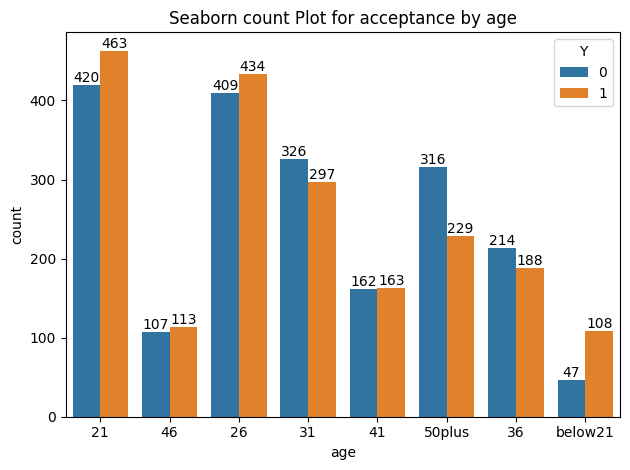

In [292]:
ax = sns.countplot(data=data_coffHouse , x= 'age', hue='Y')
plt.title('Seaborn count Plot for acceptance by age')
for container in ax.containers:
  ax.bar_label(container)
sns.set_color_codes(palette='deep')
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [286]:
data_coffHouse_accepted = data_coffHouse[data_coffHouse['Y']==1]
len(data_coffHouse_accepted)

1995

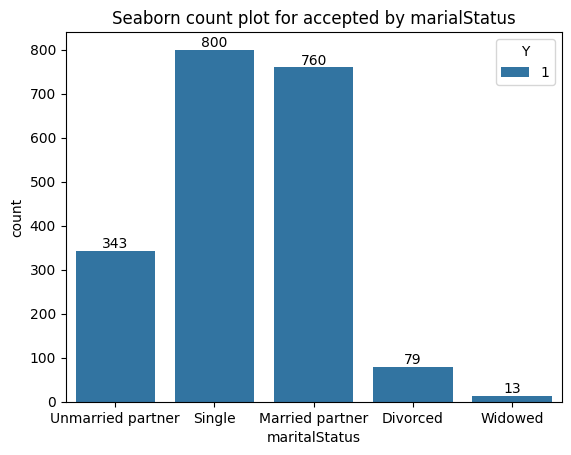

In [287]:
ax = sns.countplot(data=data_coffHouse_accepted , x= 'maritalStatus', hue='Y')
plt.title('Seaborn count plot for accepted by marialStatus')
for container in ax.containers:
  ax.bar_label(container)

In [288]:
male_driver = data_coffHouse[data_coffHouse['CoffeeHouse'].isin(["4~8", "gt8"]) & (data_coffHouse['gender']== "Male")]['Y'].mean()
Female_driver = data_coffHouse[data_coffHouse['CoffeeHouse'].isin(["4~8", "gt8"]) & (data_coffHouse['gender']== "Female")]['Y'].mean()
print("acceptance rate of male driver who went to coffee house more than 4 times : ", male_driver)
print("acceptance rate of female driver who went to coffee house more than 4 times : ", Female_driver)


acceptance rate of male driver who went to coffee house more than 4 times :  0.678082191780822
acceptance rate of female driver who went to coffee house more than 4 times :  0.6719457013574661


gender of the driver did not affect the chances of accepting the coupon for coffee house. both male and female who went to coffee house more than 4 times a month are selective about using the coffee house coupon.

In [289]:
data_coffHouse[data_coffHouse['maritalStatus'].isin(["Single","Divorced" "Widowed"]) & (data_coffHouse['passanger'].isin(["Friend(s)"]))]['Y'].mean()
data_coffHouse[data_coffHouse['maritalStatus'].isin(["Single","Divorced" "Widowed"]) & (data_coffHouse['passanger'].isin(["Alone"]))]['Y'].mean()

np.float64(0.45701849836779107)

Passenger who are single, Divorced, Widowed when they drove with Friends are more likely to use the coupon as opposed to when they travelled alone. Alone travelers accepted less than 50% times(~45%)



From the above hypothesis, approximately about 50% who recieved coupon for coffee House accepted the coupon.
Gender of the driver did not matter as both male and female accepted the coupon 67% of the time. Fequency of the coffeeHouse visits in a month did influence weather the driver accepted the coupon on not.
Another observation, 95% of the accepted drivers are either Single, with partner or Married partner.